# Gaussian Mixture Model
#### Author: Rajkumar Conjeevaram Mohan (rajkumarcm@yahoo.com)

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as m_normal

In [3]:
# Actual parameters
mu = np.array([[-2, 3], [0, 0], [2, 2]])
cv = [np.eye(2,2),
      np.eye(2,2)*0.5,
      np.eye(2,2)*0.25]

N = 100
x1 = np.random.multivariate_normal(mean=mu[0, :], cov=cv[0], size=N)
x2 = np.random.multivariate_normal(mean=mu[1, :], cov=cv[1], size=N)
x3 = np.random.multivariate_normal(mean=mu[2, :], cov=cv[2], size=N)
x = np.concatenate([x1, x2, x3], axis=0)
# np.random.shuffle(x)

x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
tmp1 = np.linspace(x1_min-1, x1_max+1, 100)
tmp2 = np.linspace(x2_min-1, x2_max+1, 100)
p, q = np.meshgrid(tmp1, tmp2)
xy = np.c_[p.ravel(), q.ravel()]
pdf = np.zeros([10000, 3])
pdf[:, 0] = m_normal.pdf(xy, mean=mu[0], cov=cv[0])
pdf[:, 1] = m_normal.pdf(xy, mean=mu[1], cov=cv[1])
pdf[:, 2] = m_normal.pdf(xy, mean=mu[2], cov=cv[2])

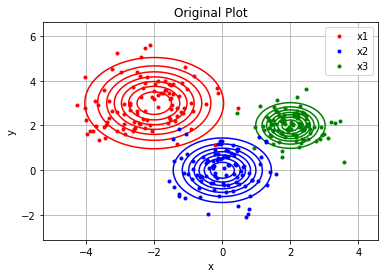

In [4]:
plt.figure()
plt.title('Original Plot')
plt.plot(x1[:, 0], x1[:, 1], '.r', linewidth=0.9, label='x1')
plt.plot(x2[:, 0], x2[:, 1], '.b', linewidth=0.9, label='x2')
plt.plot(x3[:, 0], x3[:, 1], '.g', linewidth=0.9, label='x3')
plt.contour(p, q, pdf[:, 0].reshape([100, 100]), colors='red')
plt.contour(p, q, pdf[:, 1].reshape([100, 100]), colors='blue')
plt.contour(p, q, pdf[:, 2].reshape([100, 100]), colors='green')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
x.shape

(300, 2)

In [4]:
# Initialise parameters randomly
p_mu_o = np.array([[-1, 0], [5, 2], [-2, 2]])
p_cv_o = [np.eye(2,2)*0.1,
      np.eye(2,2)*2,
      np.eye(2,2)*3]
p_mc_o = [1/3, 1/3, 1/3]

for epoch in range(100):
    # Expectation step
    r_map = np.zeros([N*3, 3])
    for k in range(3):
        r_map[:, k] = p_mc_o[k] * \
                      m_normal.pdf(x, mean=p_mu_o[k], cov=p_cv_o[k])
    r_map /= np.sum(r_map, axis=1).reshape([N*3, -1])
    
    # Maximization step
    p_mc_n = [0]*3
    p_mu_n = [0]*3
    p_cv_n = np.zeros([3, 2, 2])
    for k in range(3):
        p_mc_n[k] = np.sum(r_map[:, k])/300
        p_mu_n[k] = np.sum(r_map[:, k].reshape([-1, 1]) * x, axis=0)/\
                    np.sum(r_map[:, k], axis=0)
        for i in range(N*3):
            tmp = x[i] - p_mu_o[k]
            p_cv_n[k] += r_map[i, k] * np.outer(tmp, tmp)
        p_cv_n[k] /= np.sum(r_map[:, k])
    p_mu_o = p_mu_n
    p_cv_o = p_cv_n
    p_mc_o = p_mc_n

In [5]:
new_pdf = np.zeros([10000, 3])
new_pdf[:, 0] = m_normal.pdf(xy, mean=p_mu_o[0], cov=p_cv_o[0])
new_pdf[:, 1] = m_normal.pdf(xy, mean=p_mu_o[1], cov=p_cv_o[1])
new_pdf[:, 2] = m_normal.pdf(xy, mean=p_mu_o[2], cov=p_cv_o[2])

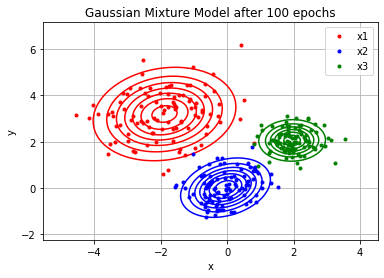

In [6]:
plt.figure()
plt.title('Gaussian Mixture Model after 100 epochs')
plt.plot(x1[:, 0], x1[:, 1], '.r', linewidth=0.9, label='x1')
plt.plot(x2[:, 0], x2[:, 1], '.b', linewidth=0.9, label='x2')
plt.plot(x3[:, 0], x3[:, 1], '.g', linewidth=0.9, label='x3')
plt.contour(p, q, new_pdf[:, 2].reshape([100, 100]), colors='red')
plt.contour(p, q, new_pdf[:, 0].reshape([100, 100]), colors='blue')
plt.contour(p, q, new_pdf[:, 1].reshape([100, 100]), colors='green')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

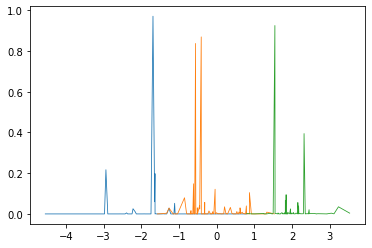

In [19]:
indices = np.argsort(x1[:, 0])
tmp_x1 = x1[indices, 0]
indices = np.argsort(x2[:, 0])
tmp_x2 = x2[indices, 0]
indices = np.argsort(x3[:, 0])
tmp_x3 = x3[indices, 0]
# 2, 0, 1
plt.figure()
plt.plot(tmp_x1, 1-r_map[:100, 2], linewidth=0.8)
plt.plot(tmp_x2, 1-r_map[100:200, 0], linewidth=0.8)
plt.plot(tmp_x3, 1-r_map[200:, 1], linewidth=0.8)
# plt.plot(tmp_x3, r_map[])
plt.show()

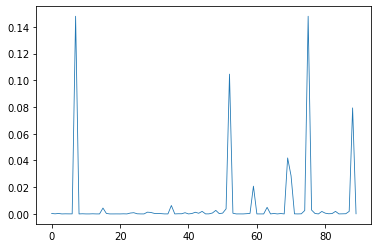

In [31]:
plt.figure()
sample_indices = np.random.randint(0, r_map.shape[0], size=90)
plt.plot(1-np.max(r_map[sample_indices], axis=1), linewidth=0.8)
plt.show()